In [1]:
import io
import subprocess
import os
import glob

import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats
from sklearn.decomposition import PCA
import pickle
import re
import math
import plotnine as pn
import seaborn as sns
import glob
import subprocess
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from numpy import log
from collections import defaultdict,Counter
import re
import statsmodels
import warnings

# !pip install statannotations==0.4.0
# #!pip uninstall statannotations --yes
# from statannotations.Annotator import Annotator

warnings.filterwarnings("ignore")
pd.options.display.max_rows = None
pd.options.display.max_columns=None
pd.options.display.max_colwidth=None
work_dir="/home/hazhang/projects/Quick_check_script"

# Check SNV and Fusion raw data

In [ ]:
SELECT * 
FROM sample_methyl_call 
WHERE run_sample_id IN (
    SELECT run_sample_id 
    FROM gh_sample 
    WHERE (cancer_type LIKE '%ung%') AND (use_case = 'mrd') AND (project = 'GH_Reveal_3_0') AND (sample_type = 'Clinical')
)

In [3]:
df_SNV = pd.read_csv("/ghds/pharma/datawarehouse/pdw/raw/latest/fact_accessions.tsv", sep = "\t")
print("Total rows in df is " + str(df_SNV.shape[0]) + "\n") 
df_SNV.head()

Total rows in df is 273363



,accn_id,addicancelcomment,analysis_version,biopsy_site,bloodcolldate,cancelledreason,cancer_category,cancerother,cancerstage,cancertype,customerpatientid,customersampleid,dna_ng,final_report_date,gh_requesttype,latest_report_date,mr_demand,mr_status,mrd_test_result,msi_score,msi_status,nof1_createdt,nof1_status,number_of_sections,patientid,primary_tumor_site,producttype,projectid,recordstatus,reportgenerationstatus,reportstatus,requestcreatedt,requeststatus,requeststudyid,requesttype,runid,sample_received_date,samplecoll_date,sampleid,study_time_point,tissue_sample_type,tissue_status,tissueavailable,tmb_category,tmb_score,tumor_fraction,visitname,physicianfirstname,physicianlastname,clientpracticename,tissue_stage
0,A48608,NaN,NaN,NaN,06/23/2016,NaN,GI,NaN,Stage III/IV or metastatic,Peritoneal Carcinoma,17-14004-513_SCRN,NaN,NaN,NaN,Research,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97564280.0,NaN,Guardant 360,CLV_01,NaN,NaN,NaN,02/04/2017,NaN,NaN,Research,NaN,02/04/2017,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Not Applicable,Not Applicable,Not Applicable,Not Applicable
1,A60080,NaN,NaN,NaN,08/08/2014,NaN,BONE / SOFT TISSUE,NaN,NaN,Soft tissue sarcoma,1351901916_Screening,NaN,NaN,NaN,Research,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100007738.0,NaN,Guardant 360,MED_01,NaN,NaN,NaN,05/26/2017,Ready for Plasma Isolation,NaN,Research,NaN,05/17/2017,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Not Applicable,Not Applicable,Not Applicable,Not Applicable
2,A0577252,NaN,NaN,NaN,09/13/2022,NaN,GI,NaN,Stage II,Gastroesophageal junction carcinoma,126-001,NaN,NaN,NaN,Research,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100379443.0,NaN,LUNAR1_3,ORACLE,NaN,NaN,NaN,09/15/2022,Ready for Plasma Isolation,NaN,Research,NaN,09/15/2022,NaN,NaN,Enrollment (Landmark),NaN,NaN,0.0,NaN,NaN,NaN,NaN,Not Applicable,Not Applicable,Not Applicable,Not Applicable
3,A01952,NaN,NaN,NaN,01/17/2012,NaN,LUNG,NaN,NaN,Lung Cancer,NaN,NaN,NaN,NaN,Research,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3908661.0,NaN,Guardant 360,GHI_02,NaN,NaN,NaN,08/28/2014,NaN,NaN,Research,NaN,06/18/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,Not Applicable,Not Applicable,Not Applicable
4,A70219,NaN,NaN,NaN,05/13/2014,NaN,LUNG,NaN,Undetermined,Lung cancer,5720022_V4G,NaN,NaN,NaN,Research,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100015065.0,NaN,Guardant 360,NVS_01,NaN,NaN,NaN,09/01/2017,Ready for Plasma Isolation,NaN,Research,NaN,08/25/2017,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Not Applicable,Not Applicable,Not Applicable,Not Applicable


In [3]:
df_1 = df_SNV[(df_SNV["chrom"] == 7) & (((df_SNV["pos"] >= 116412040) & (df_SNV["pos"] <= 116412051)) | ((df_SNV["pos"] >= 116411894) & (df_SNV["pos"] <= 116411905)))]
df_1

,chrom,pos,refbase,read_overlap_a,read_overlap_c,read_overlap_g,read_overlap_t,read_f_a,read_f_c,read_f_g,read_f_t,read_r_a,read_r_c,read_r_g,read_r_t,singleton_overlap_a,singleton_overlap_c,singleton_overlap_g,singleton_overlap_t,singleton_f_a,singleton_f_c,singleton_f_g,singleton_f_t,singleton_r_a,singleton_r_c,singleton_r_g,singleton_r_t,avg_famsize_o_a,avg_famsize_o_c,avg_famsize_o_g,avg_famsize_o_t,avg_famsize_f_a,avg_famsize_f_c,avg_famsize_f_g,avg_famsize_f_t,avg_famsize_r_a,avg_famsize_r_c,avg_famsize_r_g,avg_famsize_r_t,avg_qual_a,avg_qual_c,avg_qual_g,avg_qual_t,raw_maf,fam_overlap_a,fam_overlap_c,fam_overlap_g,fam_overlap_t,fam_f_a,fam_f_c,fam_f_g,fam_f_t,fam_r_a,fam_r_c,fam_r_g,fam_r_t,div_overlap_a,div_overlap_c,div_overlap_g,div_overlap_t,div_f_a,div_f_c,div_f_g,div_f_t,div_r_a,div_r_c,div_r_g,div_r_t,fam_mam,fam_maf,no_singleton_mam,no_singleton_maf,gh_mam,gh_maf,mol_cnt,singleton_cnt,non_singleton_cnt,ds1_cnt,ds2_cnt,dso_a,dso_c,dso_g,dso_t,dsf_a,dsf_c,dsf_g,dsf_t,dsr_a,dsr_c,dsr_g,dsr_t,run_sample_id,runid,zscore,zscore_a,zscore_c,zscore_g,zscore_t,mutbase,tier,strand_bias,sso_a,sso_c,sso_g,sso_t,ssf_a,ssf_c,ssf_g,ssf_t,ssr_a,ssr_c,ssr_g,ssr_t,vscore,llr_dso,llr_dsf,llr_dsr,llr_sso,llr_ssf,llr_ssr,ref_dist_ratio,mut_dist_ratio,dist_diff,ks_pvalue
1327266,7,116411894,T,0,0,0,13932,0,1,1,7654,0,0,0,8870,0,0,0,55,0,0,0,19,0,0,0,13,0.000000,0.00000,0.000000,16.202268,0.000000,14.000000,42.000000,16.136138,0.000000,0.000000,0.000000,17.125141,0.000000,37.000000,25.000000,36.474993,0.000066,0,0,0,1238,0,0,0,638,0,0,0,641,0,0,0,1,0,0,0,1,0,0,0,0,0,0.000000,0,0.000000,0,0.000000,2521,87,2434,817,1704,0,0,0,827,0,0,0,435,0,0,0,439,B00562317,231217_A01552_0356_AHM7YLDSX7,0.000000,0.000000,0.000000,0.000000,13309.658147,A,7,0.000000,0,0,0,356,0,0,0,184,0,0,0,189,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
1327267,7,116411895,G,0,0,13803,0,0,0,7776,2,0,0,8640,1,0,0,55,0,0,0,20,0,0,0,11,0,0.000000,0.00000,16.182859,0.000000,0.000000,0.000000,16.197145,22.500000,0.000000,0.000000,17.037616,15.000000,0.000000,0.000000,36.624097,33.000000,0.000099,0,0,1232,0,0,0,641,0,0,0,633,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0.000000,0,0.000000,0,0.000000,2508,86,2422,815,1693,0,0,821,0,0,0,435,0,0,0,435,0,B00562317,231217_A01552_0356_AHM7YLDSX7,0.000000,0.000000,0.000000,13254.885892,0.000000,A,7,0.000000,0,0,356,0,0,0,186,0,0,0,187,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
1327268,7,116411896,T,0,0,0,13998,0,0,1,7748,1,2,1,8630,0,0,0,54,0,0,0,21,0,0,0,13,0.000000,0.00000,0.000000,16.223175,0.000000,0.000000,25.000000,16.135648,36.000000,14.000000,16.000000,17.286443,25.000000,37.000000,25.000000,36.591112,0.000165,0,0,0,1231,0,0,0,652,0,0,0,628,0,0,0,3,0,0,0,0,0,0,0,2,0,0.000000,0,0.000000,0,0.000000,2515,88,2427,815,1700,0,0,0,822,0,0,0,445,0,0,0,430,B00562317,231217_A01552_0356_AHM7YLDSX7,0.000000,0.000000,0.000000,0.000000,13271.317568,A,7,1.000000,0,0,0,355,0,0,0,186,0,0,0,185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
1327269,7,116411897,T,0,0,0,13694,0,1,1,7922,0,1,0,8566,0,0,0,53,0,0,0,21,0,0,0,16,0.000000,0.00000,0.000000,16.189134,0.000000,13.000000,14.000000,15.979424,0.000000,13.000000,0.000000,17.070978,0.000000,37.000000,25.000000,36.159814,0.000099,0,0,0,1232,0,0,0,655,0,0,0,631,0,0,0,1,0,0,0,1,0,0,0,1,0,0.000000,0,0.000000,0,0.000000,2520,90,2430,823,1697,0,0,0,823,0,0,0,445,0,0,0,427,B00562317,231217_A01552_0356_AHM7YLDSX7,0.000000,0.000000,0.000000,0.000000,13298.703696,A,7,0.000000,0,0,0,356,0,0,0,189,0,0,0,188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
1327270,7,116411898,T,0,0,0,14063,0,0,1,7613,1,1,0,8670,0,0,0,56,0,0,0,19,0,0,0,14,0.000000,0.00000,0.000000,16.266515,0.000000,0.000000,15.000000,15.873112,20.000000,29.000000,0.000000,17.376701,25.000000,37.000000,25.000000,36.654665,0.000099,0,0,0,1234,0,0,0,655,0,0,0,630,0

In [38]:
df_indel_annotated = pd.read_csv("/ghds/ivd/flowcentral/231217_A01552_0356_AHM7YLDSX7.fe2192fe-39db-4f17-81a8-2d31680d0309.20231219115243/B00562317/B00562317.indel_call.annotate.hdr.tsv", sep = "\t")
print("Total rows in df is " + str(df3.shape[0]) + "\n") 
df_indel_annotated.head()

Total rows in df is 436



,run_sample_id,runid,gene,chrom,position,mut_nt,mut_aa,splice_effect,cdna,length,exon,type,percentage,total_read_cnt,fam_cnt,indel_fam_cnt,indel_ds_cnt,call,tb_code,variant_comment,analysis_version,transcript_id,llscore,reporting_category,mut_aa_short,somatic_call,somatic_review,somatic_score,cosmic,dbsnp,clinvar_id,clinvar_clinsig,molecular_consequence,functional_impact
0,B00562317,231217_A01552_0356_AHM7YLDSX7,MTOR,1,11485719,TTTGTGATTACTG>T,NaN,NaN,NaN,12,1.0,Deletion,51.75,3243,1069,542,144,0,NaN,not reportable; ExAC common germline,Sirius-1.1.2-RLS,NaN,189.276,non_coding,NaN,germline,NaN,0.149567,NaN,"rs57124099,rs146578751",NaN,NaN,non_coding,NaN
1,B00562317,231217_A01552_0356_AHM7YLDSX7,SPEN,1,16370427,CGGGGG>C,NaN,NaN,NaN,5,15.0,Deletion,99.27,10121,1781,1759,767,0,NaN,not reportable; ExAC common germline,Sirius-1.1.2-RLS,NaN,1785.720,non_coding,NaN,germline,NaN,NaN,NaN,"rs869285792,rs140434107",NaN,NaN,non_coding,NaN
2,B00562317,231217_A01552_0356_AHM7YLDSX7,ARID1A,1,26126275,GC>A,NaN,NaN,NaN,2,1.0,Deletion,100.00,5176,1664,1664,403,0,NaN,not reportable; GH SNP common germline,Sirius-1.1.2-RLS,NaN,1431.200,non_coding,NaN,germline,NaN,NaN,NaN,rs71577802,NaN,NaN,non_coding,NaN
3,B00562317,231217_A01552_0356_AHM7YLDSX7,SESN2,1,28607176,T>TG,NaN,NaN,c.1357-46dupG,1,NaN,Insertion,50.54,19789,1961,998,613,0,NaN,not reportable; ExAC common germline,Sirius-1.1.2-RLS,NM_031459.5,829.082,NaN,NaN,germline,NaN,5.051139,NaN,rs140785160,NaN,NaN,NaN,NaN
4,B00562317,231217_A01552_0356_AHM7YLDSX7,SESN2,1,30028400,CT>A,NaN,NaN,NaN,2,10.0,Deletion,43.09,3120,1176,515,88,0,NaN,not reportable; GH SNP common germline,Sirius-1.1.2-RLS,NaN,162.905,non_coding,NaN,germline,NaN,0.239744,NaN,rs386629913,NaN,NaN,non_coding,NaN


In [4]:
df_indel_annotated_MET = df_indel_annotated[df_indel_annotated["gene"] == "MET"]
df_indel_annotated_MET

NameError: name 'df_indel_annotated' is not defined

In [24]:
df5 = pd.read_csv("/ghds/ivd/flowcentral/231217_A01552_0356_AHM7YLDSX7.fe2192fe-39db-4f17-81a8-2d31680d0309.20231219115243/B00562317/B00562317.indel_call.report.hdr.tsv", sep = "\t")
print("Total rows in df is " + str(df3.shape[0]) + "\n") 
df5.head()

Total rows in df is 436



,run_sample_id,runid,gene,chrom,position,mut_nt,mut_aa,splice_effect,cdna,length,exon,type,percentage,total_read_cnt,fam_cnt,indel_fam_cnt,indel_ds_cnt,call,tb_code,variant_comment,analysis_version,transcript_id,llscore,reporting_category,mut_aa_short,somatic_call,somatic_review,somatic_score,cosmic,dbsnp,ldt_reportable,ruo_reportable,clinvar_id,clinvar_clinsig,molecular_consequence,functional_impact,mutant_allele_status
0,B00562317,231217_A01552_0356_AHM7YLDSX7,MTOR,1,11485719,TTTGTGATTACTG>T,NaN,NaN,NaN,12,1.0,Deletion,51.75,3243,1069,542,144,0,NaN,not reportable; ExAC common germline,Sirius-1.1.2-RLS,NaN,189.276,non_coding,NaN,germline,NaN,0.149567,NaN,"rs57124099,rs146578751",0,0,NaN,NaN,non_coding,NaN,NaN
1,B00562317,231217_A01552_0356_AHM7YLDSX7,SPEN,1,16370427,CGGGGG>C,NaN,NaN,NaN,5,15.0,Deletion,99.28,10121,1781,1759,767,0,NaN,not reportable; ExAC common germline,Sirius-1.1.2-RLS,NaN,1785.720,non_coding,NaN,germline,NaN,NaN,NaN,"rs869285792,rs140434107",0,0,NaN,NaN,non_coding,NaN,NaN
2,B00562317,231217_A01552_0356_AHM7YLDSX7,ARID1A,1,26126275,GC>A,NaN,NaN,NaN,2,1.0,Deletion,100.00,5176,1664,1664,403,0,NaN,not reportable; GH SNP common germline,Sirius-1.1.2-RLS,NaN,1431.200,non_coding,NaN,germline,NaN,NaN,NaN,rs71577802,0,0,NaN,NaN,non_coding,NaN,NaN
3,B00562317,231217_A01552_0356_AHM7YLDSX7,SESN2,1,28607176,T>TG,NaN,NaN,c.1357-46dupG,1,NaN,Insertion,50.54,19789,1961,998,613,0,NaN,not reportable; ExAC common germline,Sirius-1.1.2-RLS,NM_031459.5,829.082,NaN,NaN,germline,NaN,5.051139,NaN,rs140785160,0,0,NaN,NaN,NaN,NaN,NaN
4,B00562317,231217_A01552_0356_AHM7YLDSX7,SESN2,1,30028400,CT>A,NaN,NaN,NaN,2,10.0,Deletion,43.09,3120,1176,515,88,0,NaN,not reportable; GH SNP common germline,Sirius-1.1.2-RLS,NaN,162.905,non_coding,NaN,germline,NaN,0.239744,NaN,rs386629913,0,0,NaN,NaN,non_coding,NaN,NaN


In [32]:
import pandas as pd

# Replace 'B00562317.annotated.vcf' with your file name
filename = '/ghds/ivd/flowcentral/231217_A01552_0356_AHM7YLDSX7.fe2192fe-39db-4f17-81a8-2d31680d0309.20231219115243/B00562317/B00562317.annotated.vcf'

# Count the number of header lines
num_header_lines = 0
with open(filename, 'r') as file:
    for line in file:
        if line.startswith('##'):
            num_header_lines += 1
        else:
            break

# Read the VCF file into a DataFrame, skipping the header lines
df = pd.read_csv(filename, sep='\t', skiprows=num_header_lines)

df.head()

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,B00562317
0,1,1019175,.,C,G,.,PASS,TYPE=snv;GENE=CDK11A;REPORTING_CATEGORY=non_coding;REPORTING_EXON=20;DBSNP=rs2298215,AF:DSS:DST:FS:FT:RS:RT:TIER:ZSCORE:VSCORE:FD:LLR:LMUT:LERR:XAF,1.0:659:659:1812:1816:7935:7936:0:7985.79:354.0:0.0:135275.0:-25.8533:-135301.0:1.0
1,1,1019180,.,T,C,.,PASS,TYPE=snv;GENE=CDK11A;COSMIC_CNT=2;REPORTING_CATEGORY=non_coding;REPORTING_EXON=20;DBSNP=rs9442396;COSMIC=COSV53880830,AF:DSS:DST:FS:FT:RS:RT:TIER:ZSCORE:VSCORE:FD:LLR:LMUT:LERR:XAF,1.0:657:657:1805:1807:7916:7917:0:7925.55:354.0:0.0:134746.0:-25.7843:-134772.0:1.0
2,1,1635737,.,G,T,.,FAIL.VSCORE;FAIL.ZSCORE;FAIL.RATIO;FAIL.NS;FAIL.FRAGEND,TYPE=snv;GENE=CDK11A;REPORTING_CATEGORY=protein_coding;REPORTING_EXON=15;REFSEQ=NM_001313896;TRANSCRIPT_ID=NM_001313896.2;HGVS_P=p.His540Gln;HGVS_C=c.1620C>A;AA_CHANGE=H540Q;EXON=15/20;SNPEFF_GENE=CDK11A;MOLECULAR_CONSEQUENCE=missense_variant,AF:DSS:DST:FS:FT:RS:RT:TIER:ZSCORE:VSCORE:FD:LLR:LMUT:LERR:XAF,0.000606061:1:1084:1:1722:13:18514:4:5.47723:27.442:-2.74164:253.142:-30.0109:-283.153:0.001
3,1,1635749,.,C,A,.,PASS,TYPE=snv;GENE=CDK11A;COSMIC_CNT=9;REPORTABLE;REPORTING_CATEGORY=protein_coding;REPORTING_EXON=15;DBSNP=rs1136997;COSMIC=COSV52306694;REFSEQ=NM_001313896;TRANSCRIPT_ID=NM_001313896.2;HGVS_P=p.Arg536Arg;HGVS_C=c.1608G>T;AA_CHANGE=R536R;EXON=15/20;SNPEFF_GENE=CDK11A;MOLECULAR_CONSEQUENCE=synonymous_variant,AF:DSS:DST:FS:FT:RS:RT:TIER:ZSCORE:VSCORE:FD:LLR:LMUT:LERR:XAF,1.0:1143:1143:1779:1782:19413:19418:0:4012.44:354.0:0.0:283277.0:-76.1027:-283353.0:1.0
4,1,1635770,.,G,A,.,FAIL.DEAMINATION;FAIL.VSCORE;FAIL.ZSCORE;FAIL.RATIO;FAIL.NS;FAIL.FRAGEND,TYPE=snv;GENE=CDK11A;REPORTING_CATEGORY=protein_coding;REPORTING_EXON=15;DBSNP=rs562565262;REFSEQ=NM_001313896;TRANSCRIPT_ID=NM_001313896.2;HGVS_P=p.Thr529Thr;HGVS_C=c.1587C>T;AA_CHANGE=T529T;EXON=15/20;SNPEFF_GENE=CDK11A;MOLECULAR_CONSEQUENCE=synonymous_variant,AF:DSS:DST:FS:FT:RS:RT:TIER:ZSCORE:VSCORE:FD:LLR:LMUT:LERR:XAF,0.000535906:1:1249:1:1946:5:21143:14:5.47723:16.1775:-9.90872:32.6269:-25.1147:-57.7417:0.001


In [46]:
df_vcf = df[(df["#CHROM"] == "7") & (((df["POS"] >= 116412040) & (df["POS"] <= 116412051)) | ((df["POS"] >= 116411894) & (df["POS"] <= 116411905)))]
df_vcf

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,B00562317
9249,7,116411902,.,G,T,.,FAIL.VSCORE;FAIL.ZSCORE;FAIL.RATIO;FAIL.NS,"TYPE=snv;GENE=MET;REPORTING_CATEGORY=splice_acceptor;REPORTING_EXON=14;REFSEQ=NM_000245;TRANSCRIPT_ID=NM_000245.4;HGVS_C=c.2888-1G>T;SPLICE_EFFECT=splice_acceptor_variant;EXON=13/20;SNPEFF_GENE=MET;MOLECULAR_CONSEQUENCE=splice_acceptor_variant,intron_variant",AF:DSS:DST:FS:FT:RS:RT:TIER:ZSCORE:VSCORE:FD:LLR:LMUT:LERR:XAF,0.000412882:1:1686:1:2510:24:29994:4:5.47723:25.7891:3.7095:377.032:-61.4785:-438.51:0.001


In [2]:
df_fusion_annotated = pd.read_csv("/ghds/ivd/flowcentral/231217_A01552_0356_AHM7YLDSX7.fe2192fe-39db-4f17-81a8-2d31680d0309.20231219115243/B00562317/B00562317.denovofusion_call.annotate.hdr.tsv", sep = "\t")
df_fusion_1 = df_fusion_annotated[(df_fusion_annotated["gene_a"] == "MET") | (df_fusion_annotated["gene_b"] == "MET")]
df_fusion_1

,runid,run_sample_id,call,valid,chrom_a,pos_a,direction_a,chrom_b,pos_b,direction_b,indel,mol_cnt,mol_cnt_a,mol_cnt_b,fusion_ds_count_ab,fusion_robust_count_ab,fusion_mol_count_ab,fusion_read_count_ab,percentage,average_family_size,failure_mode,gene_a,gene_b,exons,exon_a,exon_b,somatic_call,tag,reciprocal_to,cnv,gene_orientation_a,gene_orientation_b,downstream_gene,nof1_comment,functional_impact,variant_comment,mutant_allele_status
313,231217_A01552_0356_AHM7YLDSX7,B00562317,0,0,7,116411708,-1,7,116414933,1,-3224,NaN,NaN,NaN,144,238,244,2374,NaN,9.73,pseudogene,MET,MET,13-14,NaN,NaN,NaN,63_e1_[748:749]s{-2},NaN,0,1.0,1.0,NaN,"MET(7:116411708)-MET(7:116414933); deletion, exon 13-14",NaN,NaN,NaN


In [3]:
df_fusion_2 = df_fusion_annotated[df_fusion_annotated["call"] == 1]
df_fusion_2

,runid,run_sample_id,call,valid,chrom_a,pos_a,direction_a,chrom_b,pos_b,direction_b,indel,mol_cnt,mol_cnt_a,mol_cnt_b,fusion_ds_count_ab,fusion_robust_count_ab,fusion_mol_count_ab,fusion_read_count_ab,percentage,average_family_size,failure_mode,gene_a,gene_b,exons,exon_a,exon_b,somatic_call,tag,reciprocal_to,cnv,gene_orientation_a,gene_orientation_b,downstream_gene,nof1_comment,functional_impact,variant_comment,mutant_allele_status
39,231217_A01552_0356_AHM7YLDSX7,B00562317,1,1,1,156844361,1,1,154142876,1,0,4745.0,4745.0,107.0,29,55,70,408,1.475,5.829,pass,NTRK1,TPM3,1-9,NaN,NaN,somatic,82_e1_[267:268]s{-2},NaN,0,1.0,-1.0,A,TPM3(1:154142876)-NTRK1(1:156844361); TPM3 is the upstream gene (N-terminus),deleterious,NaN,NaN
72,231217_A01552_0356_AHM7YLDSX7,B00562317,1,1,2,29446396,-1,2,42522656,-1,0,4748.0,4748.0,4490.0,151,226,232,3024,4.886,13.034,pass,ALK,EML4,1-19,NaN,NaN,somatic,62_e1_[520:521]s{-2},NaN,0,-1.0,1.0,A,EML4(2:42522656)-ALK(2:29446396); EML4 is the upstream gene (N-terminus),deleterious,NaN,NaN
167,231217_A01552_0356_AHM7YLDSX7,B00562317,1,1,4,1808663,-1,4,1741429,1,67235,3009.0,3009.0,346.0,101,178,183,2252,6.082,12.306,pass,FGFR3,TACC3,18,NaN,NaN,somatic,1_e1_[294:295]s{-2},NaN,0,1.0,1.0,B,FGFR3(4:1808663)-TACC3(4:1741429); FGFR3 is the upstream gene (N-terminus),deleterious,NaN,NaN
217,231217_A01552_0356_AHM7YLDSX7,B00562317,1,1,6,117645580,-1,5,149784243,1,0,4775.0,2556.0,4775.0,52,127,163,697,3.414,4.276,pass,ROS1,CD74,1-33,NaN,NaN,somatic,45_e1_[583:584]s{-2},NaN,0,-1.0,-1.0,A,CD74(5:149784243)-ROS1(6:117645580); CD74 is the upstream gene (N-terminus),deleterious,NaN,NaN


# Pull the e-manifest from LIMS for TB (NCC_IST14_Infinity_01/NCC_IST14_Infinity_02)

In [4]:
#readin fact_accessions.tsv to pull LIMs data
df_lims = pd.read_csv("/ghds/projects/pharma/datawarehouse/pdw/raw/latest/fact_accessions.tsv", sep = "\t")
df_lims.head()
#readin sample_data.csv to pull plasma input volumn
df_plasma = pd.read_csv("/ghsfa/projects/pharma/datawarehouse/pdw/batch_sample_data.csv", header = 0)
df_plasma.head()

,projectid,accn_id,sampleid,runid,plasma_volume,total_yield,plasma_volume_observed,plasma_volume_remaining,samplegenepanelversion,u_addicancelcomment,cancelledreason,sample_failedreason,reportstatus,requeststatus,recordstatus,samplestatus,gh_requesttype,sampletype,u_plasmabatchid
0,GHI_02,A00130,A0013002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Research,Blood,NaN
1,GHI_02,A00148,A0014801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed,NaN,NaN,Research,Blood,NaN
2,GHI_03,A00169,A0016901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed,NaN,Closed,Validation,Blood,NaN
3,GHI_02,A00370,A0037001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Research,Blood,NaN
4,GHI_02,A00407,A0040701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Research,Blood,NaN


In [9]:
#readin batch NCC_IST14_Infinity_01's original e-manifest data
# df_ori = pd.read_csv("/home/hazhang/projects/Quick_check_script/NCC_IST14_Infinity_01/NCC_IST14_Infinity_01_emanifest_04JAN2024.xlsx_Adhoc_Query_Result_Report.csv", header = 0)
# print(df_ori.shape)
# df_ori.head()

#readin batch NCC_IST14_Infinity_02's original e-manifest data
df_ori = pd.read_csv("/home/hazhang/projects/Quick_check_script/NCC_IST14_Infinity_02/NCC_IST14_Infinity_02_emanifest_05FEB2024.csv", header = 0)
print(df_ori.shape)
df_ori.head()

(5, 15)


,Project,Request,PatientId,Blood Collection Date,Received date,TRF Barcode,Tracking No.,Last Name,First Name,LastName,PracticeName,Practice Country,Treatment Notes,Cancel Id,Study TimePoint
0,NCC_14,A0937514,100530986,Jan/05/2024,Jan/06/2024,50104853,817324078629,77,Masaaki,Ito,NCC_14: National Cancer Center Hospital East,Japan,NaN,NaN,Post-surgery
1,NCC_14,A0944252,100541772,Jan/16/2024,Jan/17/2024,50104719,817324119460,81,Masaaki,Ito,NCC_14: National Cancer Center Hospital East,Japan,NaN,NaN,Post-surgery
2,NCC_14,A0945404,100579633,Jan/17/2024,Jan/18/2024,50105653,817713914019,87,Masaaki,Ito,NCC_14: National Cancer Center Hospital East,Japan,NaN,NaN,Post-surgery
3,NCC_14,A0953747,100557412,Jan/26/2024,Jan/29/2024,50105540,817323909226,85,Masaaki,Ito,NCC_14: National Cancer Center Hospital East,Japan,NaN,NaN,Pre-surgery
4,NCC_14,A0959493,100541772,Feb/05/2024,Feb/06/2024,50104903,817324119471,81,Masaaki,Ito,NCC_14: National Cancer Center Hospital East,Japan,NaN,NaN,Post-surgery


In [102]:
#For NCC_IST14_Infinity_01 batch

#get the required columns information from LIMs based on "accn_id" in fact_accessions.tsv which is "GHRequestID"
requestid_list = df_ori.Request.tolist() 
df_lims_NCC = df_lims[df_lims.accn_id.isin(requestid_list)]

#found one sample's "customerpatientid" is Nan, so filled with "Nan"
df_lims_NCC["customerpatientid"] = df_lims_NCC["customerpatientid"].fillna("NaN")

#create the "Customer_SampleID"
# df_lims_NCC["Customer_SampleID"] = df_lims_NCC["customerpatientid"] + "_" + df_lims_NCC["visitname"]
df_lims_NCC["customersampleid"] = df_lims_NCC["customerpatientid"] + "_" + df_lims_NCC["visitname"]
df_lims_NCC.to_csv("/home/hazhang/projects/Quick_check_script/NCC_IST14_Infinity_01/fact_accessions_NCC_IST14_Infinity_01_HYZ_01232024.tsv", sep='\t', index=False)
print(df_lims_NCC.shape)
df_lims_NCC

(35, 51)


,accn_id,addicancelcomment,analysis_version,biopsy_site,bloodcolldate,cancelledreason,cancer_category,cancerother,cancerstage,cancertype,customerpatientid,customersampleid,dna_ng,final_report_date,gh_requesttype,latest_report_date,mr_demand,mr_status,mrd_test_result,msi_score,msi_status,nof1_createdt,nof1_status,number_of_sections,patientid,primary_tumor_site,producttype,projectid,recordstatus,reportgenerationstatus,reportstatus,requestcreatedt,requeststatus,requeststudyid,requesttype,runid,sample_received_date,samplecoll_date,sampleid,study_time_point,tissue_sample_type,tissue_status,tissueavailable,tmb_category,tmb_score,tumor_fraction,visitname,physicianfirstname,physicianlastname,clientpracticename,tissue_stage
3110,A0909934,NaN,NaN,NaN,11/29/2023,NaN,Other,NaN,NaN,Rectal Cancer,0087,0087_Pre-surgery,NaN,NaN,Research,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100579633.0,NaN,Guardant 360,NCC_14,NaN,NaN,NaN,11/30/2023,Analytics in Progress,JCOG1801 A1,Research,NaN,11/30/2023,NaN,NaN,Pre-surgery,NaN,NaN,NaN,NaN,NaN,NaN,Pre-surgery,Not Applicable,Not Applicable,Not Applicable,Not Applicable
3111,A0907271,NaN,NaN,NaN,11/24/2023,NaN,Other,NaN,NaN,Rectal Cancer,0081,0081_Post-CRT,NaN,NaN,Research,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100541772.0,NaN,Guardant 360,NCC_14,NaN,NaN,NaN,11/27/2023,Ready for Generate Report,GHStudy,Research,NaN,11/27/2023,NaN,NaN,Post-CRT,NaN,NaN,NaN,NaN,NaN,NaN,Post-CRT,Not Applicable,Not Applicable,Not Applicable,Not Applicable
8946,A0887498,NaN,NaN,NaN,11/01/2023,NaN,Other,NaN,NaN,Rectal Cancer,0080,0080_Post-CRT,NaN,NaN,Research,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100538423.0,NaN,Guardant 360,NCC_14,NaN,NaN,NaN,11/02/2023,Ready for Generate Report,JCOG1801 A1,Research,NaN,11/02/2023,NaN,NaN,Post-CRT,NaN,NaN,NaN,NaN,NaN,NaN,Post-CRT,Not Applicable,Not Applicable,Not Applicable,Not Applicable
25458,A0730870,NaN,NaN,NaN,04/19/2023,NaN,Other,NaN,NaN,Rectal Cancer,0071,0071_Post-surgery,NaN,NaN,Research,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100471394.0,NaN,Guardant 360,NCC_14,NaN,NaN,NaN,04/20/2023,Ready for Generate Report,JCOG1801 A1,Research,NaN,04/20/2023,NaN,NaN,Post-surgery,NaN,NaN,NaN,NaN,NaN,NaN,Post-surgery,Not Applicable,Not Applicable,Not Applicable,Not Applicable
25459,A0859073,NaN,NaN,NaN,09/25/2023,NaN,Other,NaN,NaN,Rectal Cancer,0083,0083_Pre-surgery,NaN,NaN,Research,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100547846.0,NaN,Guardant 360,NCC_14,NaN,NaN,NaN,09/26/2023,Ready for Generate Report,JCOG1801 A1,Research,NaN,09/26/2023,NaN,NaN,Pre-surgery,NaN,NaN,NaN,NaN,NaN,NaN,Pre-surgery,Not Applicable,Not Applicable,Not Applicable,Not Applicable
29701,A0859218,NaN,NaN,NaN,09/25/2023,NaN,Other,NaN,NaN,Rectal Cancer,0079,0079_Post-surgery,NaN,NaN,Research,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100524806.0,NaN,Guardant 360,NCC_14,NaN,NaN,NaN,09/26/2023,Analytics in Progress,JCOG1801 A1,Research,NaN,09/26/2023,NaN,NaN,Post-surgery,NaN,NaN,NaN,NaN,NaN,NaN,Post-surgery,Not Applicable,Not Applicable,Not Applicable,Not Applicable
29702,A0874958,NaN,NaN,NaN,10/12/2023,NaN,Other,NaN,NaN,Rectal Cancer,0085,0085_Pre-CRT,NaN,NaN,Research,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100557412.0,NaN,Guardant 360,NCC_14,NaN,NaN,NaN,10/16/2023,Analytics in Progress,JCOG1801 A1,Research,NaN,10/16/2023,NaN,NaN,Pre-CRT,NaN,NaN,NaN,NaN,NaN,NaN,Pre-CRT,Not Applicable,Not Applicable,Not Applicable,Not Applicable
37326,A0911024,NaN,NaN,NaN,11/30/2023,NaN,Other,NaN,NaN,Rectal Cancer,0077,0077_Post-CRT,NaN,NaN,Research,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100530986.0,NaN,Guardant 360,NCC_14,NaN,NaN,NaN,12/01/2023,Ready for Generate Report,GHStudy,Research,NaN,12/01/2023,NaN,NaN,Post-CRT,NaN,NaN,NaN,NaN,NaN,NaN,Post-CRT,Not Applicable,Not Applicable,Not Applicable,Not Applicable
51562,A0924299,NaN,NaN,NaN,12/15/2023,NaN,Other,NaN,NaN,Rectal Cancer,0085,0085_Post-CRT,NaN,NaN,Research,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100557412.0,NaN,Guardant 360,NCC_14,NaN,NaN,NaN,12/18/2023,Analytics in Progress,JCOG1801 A1,Research,NaN,12/18/2023,NaN,NaN,Post-CRT,NaN,NaN,

In [12]:
#For NCC_IST14_Infinity_02 batch

#get the required columns information from LIMs based on "accn_id" in fact_accessions.tsv which is "GHRequestID"
requestid_list = df_ori.Request.tolist() 
df_lims_NCC = df_lims[df_lims.accn_id.isin(requestid_list)]

#found all 5 sample's "visitname" is Nan, so replace all the values of the column "visitname" with the values of the column "study_time_point"
df_lims_NCC["visitname"] = df_lims_NCC["study_time_point"]

#create the "Customer_SampleID" since all 5 samples's "customersampleid" are missing
df_lims_NCC["customersampleid"] = df_lims_NCC["customerpatientid"] + "_" + df_lims_NCC["visitname"]
print(df_lims_NCC.shape)

#save the customized fact_accessions file
df_lims_NCC.to_csv("/home/hazhang/projects/Quick_check_script/NCC_IST14_Infinity_02/fact_accessions_NCC_IST14_Infinity_02_HYZ_02262024.tsv", sep='\t', index=False)
df_lims_NCC

(5, 51)


,accn_id,addicancelcomment,analysis_version,biopsy_site,bloodcolldate,cancelledreason,cancer_category,cancerother,cancerstage,cancertype,customerpatientid,customersampleid,dna_ng,final_report_date,gh_requesttype,latest_report_date,mr_demand,mr_status,mrd_test_result,msi_score,msi_status,nof1_createdt,nof1_status,number_of_sections,patientid,primary_tumor_site,producttype,projectid,recordstatus,reportgenerationstatus,reportstatus,requestcreatedt,requeststatus,requeststudyid,requesttype,runid,sample_received_date,samplecoll_date,sampleid,study_time_point,tissue_sample_type,tissue_status,tissueavailable,tmb_category,tmb_score,tumor_fraction,visitname,physicianfirstname,physicianlastname,clientpracticename,tissue_stage
19666,A0945404,NaN,NaN,NaN,01/17/2024,NaN,Other,NaN,NaN,Rectal Cancer,0087,0087_Post-surgery,NaN,NaN,Research,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100579633.0,NaN,Guardant 360,NCC_14,NaN,NaN,NaN,01/18/2024,Analytics in Progress,JCOG1801 A1,Research,NaN,01/18/2024,NaN,NaN,Post-surgery,NaN,NaN,NaN,NaN,NaN,NaN,Post-surgery,Not,Applicable,Not Applicable,Not Applicable
65706,A0959493,NaN,NaN,NaN,02/05/2024,NaN,Other,NaN,NaN,Rectal Cancer,0081,0081_Post-surgery,NaN,NaN,Research,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100541772.0,NaN,Guardant 360,NCC_14,NaN,NaN,NaN,02/06/2024,Analytics in Progress,JCOG1801 A1,Research,NaN,02/06/2024,NaN,NaN,Post-surgery,NaN,NaN,NaN,NaN,NaN,NaN,Post-surgery,Not,Applicable,Not Applicable,Not Applicable
111919,A0937514,NaN,NaN,NaN,01/05/2024,NaN,Other,NaN,NaN,Rectal Cancer,0077,0077_Post-surgery,NaN,NaN,Research,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100530986.0,NaN,Guardant 360,NCC_14,NaN,NaN,NaN,01/06/2024,Analytics in Progress,JCOG1801 A1,Research,NaN,01/06/2024,NaN,NaN,Post-surgery,NaN,NaN,NaN,NaN,NaN,NaN,Post-surgery,Not,Applicable,Not Applicable,Not Applicable
192111,A0953747,NaN,NaN,NaN,01/26/2024,NaN,Other,NaN,NaN,Rectal Cancer,0085,0085_Pre-surgery,NaN,NaN,Research,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100557412.0,NaN,Guardant 360,NCC_14,NaN,NaN,NaN,01/29/2024,Analytics in Progress,JCOG1801 A1,Research,NaN,01/29/2024,NaN,NaN,Pre-surgery,NaN,NaN,NaN,NaN,NaN,NaN,Pre-surgery,Not,Applicable,Not Applicable,Not Applicable
228233,A0944252,NaN,NaN,NaN,01/16/2024,NaN,Other,NaN,NaN,Rectal Cancer,0081,0081_Pre-surgery,NaN,NaN,Research,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100541772.0,NaN,Guardant 360,NCC_14,NaN,NaN,NaN,01/17/2024,Analytics in Progress,JCOG1801 A1,Research,NaN,01/17/2024,NaN,NaN,Pre-surgery,NaN,NaN,NaN,NaN,NaN,NaN,Pre-surgery,Not,Applicable,Not Applicable,Not Applicable


In [13]:
#check the plasma input 
df_plasma_NCC = df_plasma[df_plasma.accn_id.isin(requestid_list)]
print(df_plasma_NCC.shape)
print(len(df_plasma_NCC["accn_id"].unique()))
df_plasma_NCC["accn_id"].unique()

#found all the sample's plasma input values are missing 
df_plasma_NCC

(20, 19)
5


array(['A0953747', 'A0944252', 'A0945404', 'A0937514', 'A0959493'],
      dtype=object)

In [18]:
#check one "GHRequestID" from the original e-manifest file
df_plasma_1 = df_plasma[df_plasma["accn_id"] == "A0937514"]
df_plasma_1

,projectid,accn_id,sampleid,runid,plasma_volume,total_yield,plasma_volume_observed,plasma_volume_remaining,samplegenepanelversion,u_addicancelcomment,cancelledreason,sample_failedreason,reportstatus,requeststatus,recordstatus,samplestatus,gh_requesttype,sampletype,u_plasmabatchid
317768,NCC_14,A0937514,B00578302,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,Analytics in Progress,NaN,Ready for DNA Extraction,Research,Plasma,sjuarezdiaz01062024_2
325401,NCC_14,A0937514,B00578299,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,Analytics in Progress,NaN,Analytics in progress,Research,Plasma,NCC_IST14_Infinity_02_sjuarezdiaz01062024_2
349876,NCC_14,A0937514,B00578300,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,Analytics in Progress,NaN,Ready for DNA Extraction,Research,Plasma,NCC_IST14_Infinity_02_sjuarezdiaz01062024_2
534644,NCC_14,A0937514,B00578301,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,Analytics in Progress,NaN,Ready for DNA Extraction,Research,Plasma,sjuarezdiaz01062024_2


In [21]:
#subset the columns to generate the e-manifest
df_lims_NCC_1= df_lims_NCC.loc[:, ["customersampleid", "requeststudyid", 'accn_id', 'customerpatientid', 'visitname', 'cancerother', 'cancerstage', 'bloodcolldate', 'sample_received_date']]
df_lims_NCC_1.columns = ['Customer Sample ID', 'Study ID', 'GHRequestID', 'Patient ID', 'Sample Time point', 'Cancer Type', 'Cancer Stage', 'Sample Collection Date', 'Received_date']
df_lims_NCC_1["Estimated Quantity"] = np.nan

#As learned from AM team that this is a CRC batch, so replaced all the "Cancer Type" with "CRC".
df_lims_NCC_1["Cancer Type"] = "CRC"

#As no cancer stage info, so I gave all the samples's cancer stage as "NaN"
df_lims_NCC_1["Sample Type"] = np.nan

#As found all the sample's plasma input values are missing, so gave all samples's plasma input values as 1
df_lims_NCC_1["plasma_volume_manifest"] = 1

#save the customized e-manifest file
df_lims_NCC_1.to_csv("/home/hazhang/projects/Quick_check_script/NCC_IST14_Infinity_02/NCC_IST14_Infinity_02_emanifest_02262024_HYZ.csv", index=False)    
df_lims_NCC_1

,Customer Sample ID,Study ID,GHRequestID,Patient ID,Sample Time point,Cancer Type,Cancer Stage,Sample Collection Date,Received_date,Estimated Quantity,Sample Type,plasma_volume_manifest
19666,0087_Post-surgery,JCOG1801 A1,A0945404,0087,Post-surgery,CRC,NaN,01/17/2024,01/18/2024,NaN,NaN,1
65706,0081_Post-surgery,JCOG1801 A1,A0959493,0081,Post-surgery,CRC,NaN,02/05/2024,02/06/2024,NaN,NaN,1
111919,0077_Post-surgery,JCOG1801 A1,A0937514,0077,Post-surgery,CRC,NaN,01/05/2024,01/06/2024,NaN,NaN,1
192111,0085_Pre-surgery,JCOG1801 A1,A0953747,0085,Pre-surgery,CRC,NaN,01/26/2024,01/29/2024,NaN,NaN,1
228233,0081_Pre-surgery,JCOG1801 A1,A0944252,0081,Pre-surgery,CRC,NaN,01/16/2024,01/17/2024,NaN,NaN,1


# NTC contamination checking 01242024

In [2]:
def read_vcf(filename):
    # Count the number of header lines
    num_header_lines = 0
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith('##'):
                num_header_lines += 1
            else:
                break

    # Read the VCF file into a DataFrame
    df = pd.read_csv(filename, sep='\t', skiprows=num_header_lines)
    return df

In [42]:
#Readin vcf files of 3 different FCs in batch ID: PS3C367
BHMK3JDSX7 = '/ghess/pharma/to_move/Sirius_REPORTING/fc_dir_softlink/240114_A01021_0603_BHMK3JDSX7_PS3C367_AP1.Sirius-1.1.2-RLS/NTC/NTC.annotated.vcf'
AHMJ55DSX7 = '/ghess/pharma/to_move/Sirius_REPORTING/fc_dir_softlink/240115_A01467_0441_AHMJ55DSX7_PS3C367_AP2.Sirius-1.1.2-RLS/NTC/NTC.annotated.vcf'
BHMKGKDSX7 = '/ghess/pharma/to_move/Sirius_REPORTING/fc_dir_softlink/240115_A01467_0440_BHMKGKDSX7_PS3C367_AP3.Sirius-1.1.2-RLS/NTC/NTC.annotated.vcf'

#each FCs
df_BHMK3JDSX7 = read_vcf(BHMK3JDSX7)
df_BHMK3JDSX7 = df_BHMK3JDSX7[(df_BHMK3JDSX7["FILTER"] == "PASS")]
print("#variants from .annotated.vcf with PASS of FC BHMK3JDSX7 in batch PS3C367 is " + str(df_BHMK3JDSX7.shape[0]))

df_AHMJ55DSX7 = read_vcf(AHMJ55DSX7)
df_AHMJ55DSX7 = df_AHMJ55DSX7[(df_AHMJ55DSX7["FILTER"] == "PASS")]
print("#variants from .annotated.vcf with PASS of FC AHMJ55DSX7 in batch PS3C367 is " + str(df_AHMJ55DSX7.shape[0]))

df_BHMKGKDSX7 = read_vcf(BHMKGKDSX7)
df_BHMKGKDSX7 = df_BHMKGKDSX7[(df_BHMKGKDSX7["FILTER"] == "PASS")]
print("#variants from .annotated.vcf with PASS of FC BHMKGKDSX7 in batch PS3C367 is " + str(df_BHMKGKDSX7.shape[0]))

#variants from .annotated.vcf with PASS of FC BHMK3JDSX7 in batch PS3C367 is 30
#variants from .annotated.vcf with PASS of FC AHMJ55DSX7 in batch PS3C367 is 6
#variants from .annotated.vcf with PASS of FC BHMKGKDSX7 in batch PS3C367 is 63


In [66]:
#deep dive on NTC variant with MY's script https://github.com/guardant/gh-mcai/blob/main/Sirius_EAP/src/python/ntc_check.py
from ntc_check import *

import os
print(os.getcwd())

/ghdevhome/home/hazhang/projects/Quick_check_script


In [53]:
fc_dir_lst = ["/ghess/pharma/to_move/Sirius_REPORTING/fc_dir_softlink/240114_A01021_0603_BHMK3JDSX7_PS3C367_AP1.Sirius-1.1.2-RLS", "/ghess/pharma/to_move/Sirius_REPORTING/fc_dir_softlink/240115_A01467_0441_AHMJ55DSX7_PS3C367_AP2.Sirius-1.1.2-RLS", "/ghess/pharma/to_move/Sirius_REPORTING/fc_dir_softlink/240115_A01467_0440_BHMKGKDSX7_PS3C367_AP3.Sirius-1.1.2-RLS"]
PS3C367_NTC_snv_indel_df = collect_contam_vars(fc_dir_lst)
print(PS3C367_NTC_snv_indel_df.shape[0])
PS3C367_NTC_snv_indel_df.head()

99


,run_sample_id,runid,gene,chrom,position,mut_nt,mut_aa,splice_effect,cdna,percentage,mol_cnt,zscore,tier,cosmic,dbsnp,call,tb_code,variant_comment,analysis_version,transcript_id,exon,reporting_category,somatic_call,somatic_review,somatic_score,ldt_reportable,ruo_reportable,clinvar_id,clinvar_clinsig,molecular_consequence,functional_impact,mutant_allele_status,length,type,total_read_cnt,fam_cnt,indel_fam_cnt,indel_ds_cnt,llscore,mut_aa_short,var,variant
0,NTC,240114_A01021_0603_BHMK3JDSX7,AKT1,14,105239349,G>C,R346R,NaN,c.1038C>G,100.0,2.0,10.9545,6.0,NaN,NaN,1,NaN,"germline variant, MAF >= 0.7; ldt_reportable",Sirius-1.1.2-RLS,NM_001014432.2,12,protein_coding,germline,NaN,NaN,0,1,NaN,NaN,synonymous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R346R,AKT1 14 105239349 G>C R346R
1,NTC,240114_A01021_0603_BHMK3JDSX7,AKT1,14,105239385,C>A,G334G,NaN,c.1002G>T,100.0,2.0,10.9545,6.0,NaN,NaN,1,NaN,"germline variant, MAF >= 0.7; ldt_reportable",Sirius-1.1.2-RLS,NM_001014432.2,12,protein_coding,germline,NaN,NaN,0,1,NaN,NaN,synonymous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G334G,AKT1 14 105239385 C>A G334G
2,NTC,240114_A01021_0603_BHMK3JDSX7,EP300,22,41573022,G>A,K1769K,NaN,c.5307G>A,100.0,2.0,10.9545,6.0,NaN,NaN,1,NaN,"germline variant, MAF >= 0.7",Sirius-1.1.2-RLS,NM_001429.4,31,protein_coding,germline,NaN,NaN,0,1,NaN,NaN,synonymous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K1769K,EP300 22 41573022 G>A K1769K
3,NTC,240114_A01021_0603_BHMK3JDSX7,EP300,22,41573031,A>G,K1772K,NaN,c.5316A>G,100.0,2.0,10.9545,6.0,NaN,NaN,1,NaN,"germline variant, MAF >= 0.7",Sirius-1.1.2-RLS,NM_001429.4,31,protein_coding,germline,NaN,NaN,0,1,NaN,NaN,synonymous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K1772K,EP300 22 41573031 A>G K1772K
4,NTC,240114_A01021_0603_BHMK3JDSX7,EP300,22,41573034,G>C,R1773R,NaN,c.5319G>C,100.0,2.0,13.7121,6.0,NaN,NaN,1,NaN,"germline variant, MAF >= 0.7",Sirius-1.1.2-RLS,NM_001429.4,31,protein_coding,germline,NaN,NaN,0,1,NaN,NaN,synonymous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R1773R,EP300 22 41573034 G>C R1773R


In [69]:
#readin the NCC_IST14_Infinity_01_pre_tb_tb_changed_modular_RUO_report.csv after pre_tb
df_ncc_report = pd.read_csv("/home/hazhang/projects/Quick_check_script/NCC_IST14_Infinity_01/NCC_IST14_Infinity_01_pre_tb_tb_changed_modular_RUO_report.csv", header = 1)
df_ncc_report.head()

,Study_ID,Customer_SampleID,GHRequestID,GHSampleID,Patient_ID,Visit_name,Alt-NoAlt,Sample_status,Sample_comment,Variant_type,Indel_type,Gene,Chromosome,Position,Exon,Mut_aa,Mut_nt,Mut_cdna,Transcript,Percentage,Splice_effect,Somatic_status,Molecular_consequence,Fusion_chrom_b,Fusion_gene_b,Fusion_position_a,Fusion_position_b,Direction_a,Direction_b,Downstream_gene,Copy_number,CNV_type,COSMIC,dbSNP,ClinVar,ClinVarID,Functional_impact,Mutant_allele_status,Mol_count,Max_percentage,Alleletype,HRD_score,Tumor_methylation_status,Tumor_methylation_score,TMB_score,TMB_category,MSI_High,cfDNA_ng,Plasma_ml_input,Plasma_ml_remaining,Received_date,Bloodcoll_date,Reported_date,Cancertype,Practice_name,Physician_name
0,GHStudy,0081_Post-CRT,A0907271,A090727101,81.0,Post-CRT,1,SUCCESS,NaN,SNV,NaN,GPC3,X,132887779.0,3.0,R254R,T>C,c.762A>G,NM_001164617.2,100.00,NaN,germline,synonymous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs934493521,NaN,NaN,NaN,NaN,453.0,9.31,NaN,NaN,Not Detected,0.0,NaN,Not evaluable,Not Detected,17.888,1.0,0.0,11/27/2023,11/24/2023,01/23/2024,Unknown,Not Applicable,Not Applicable
1,GHStudy,0081_Post-CRT,A0907271,A090727101,81.0,Post-CRT,1,SUCCESS,NaN,SNV,NaN,MYD88,3,38182305.0,4.0,D247D,C>T,c.741C>T,NM_002468.5,51.88,NaN,germline,synonymous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COSV57170784,rs200589757,NaN,NaN,NaN,NaN,1529.0,9.31,NaN,NaN,Not Detected,0.0,NaN,Not evaluable,Not Detected,17.888,1.0,0.0,11/27/2023,11/24/2023,01/23/2024,Unknown,Not Applicable,Not Applicable
2,GHStudy,0081_Post-CRT,A0907271,A090727101,81.0,Post-CRT,1,SUCCESS,NaN,SNV,NaN,CDKN1A,6,36651983.0,3.0,D35D,T>C,c.105T>C,NM_000389.5,51.71,NaN,germline,synonymous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs201800542,NaN,NaN,NaN,NaN,2144.0,9.31,NaN,NaN,Not Detected,0.0,NaN,Not evaluable,Not Detected,17.888,1.0,0.0,11/27/2023,11/24/2023,01/23/2024,Unknown,Not Applicable,Not Applicable
3,GHStudy,0081_Post-CRT,A0907271,A090727101,81.0,Post-CRT,1,SUCCESS,NaN,SNV,NaN,CD276,15,74005293.0,10.0,A534V,C>T,c.1601C>T,NM_001024736.2,51.51,NaN,germline,missense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs781544999,NaN,NaN,NaN,NaN,1895.0,9.31,NaN,NaN,Not Detected,0.0,NaN,Not evaluable,Not Detected,17.888,1.0,0.0,11/27/2023,11/24/2023,01/23/2024,Unknown,Not Applicable,Not Applicable
4,GHStudy,0081_Post-CRT,A0907271,A090727101,81.0,Post-CRT,1,SUCCESS,NaN,SNV,NaN,KMT2B,19,36216653.0,13.0,H1273H,T>C,c.3819T>C,NM_014727.3,51.35,NaN,germline,synonymous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs1288617076,NaN,NaN,NaN,NaN,2245.0,9.31,NaN,NaN,Not Detected,0.0,NaN,Not evaluable,Not Detected,17.888,1.0,0.0,11/27/2023,11/24/2023,01/23/2024,Unknown,Not Applicable,Not Applicable


In [76]:
#check the NTC variants that overlaps the final report in NCC_IST14_Infinity_01
ntc_list = PS3C367_NTC_snv_indel_df.position.tolist()
df_overlap = df_ncc_report[df_ncc_report.Position.isin(ntc_list)]
df_overlap

,Study_ID,Customer_SampleID,GHRequestID,GHSampleID,Patient_ID,Visit_name,Alt-NoAlt,Sample_status,Sample_comment,Variant_type,Indel_type,Gene,Chromosome,Position,Exon,Mut_aa,Mut_nt,Mut_cdna,Transcript,Percentage,Splice_effect,Somatic_status,Molecular_consequence,Fusion_chrom_b,Fusion_gene_b,Fusion_position_a,Fusion_position_b,Direction_a,Direction_b,Downstream_gene,Copy_number,CNV_type,COSMIC,dbSNP,ClinVar,ClinVarID,Functional_impact,Mutant_allele_status,Mol_count,Max_percentage,Alleletype,HRD_score,Tumor_methylation_status,Tumor_methylation_score,TMB_score,TMB_category,MSI_High,cfDNA_ng,Plasma_ml_input,Plasma_ml_remaining,Received_date,Bloodcoll_date,Reported_date,Cancertype,Practice_name,Physician_name
1188,JCOG1801 A1,0085_Post-CRT,A0924299,B00564835,85.0,Post-CRT,1,SUCCESS,NaN,SNV,NaN,AKT1,14,105239349.0,12.0,R346R,G>C,c.1038C>G,NM_001014432.2,0.12,NaN,somatic,synonymous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2552.0,0.16,NaN,NaN,Not Detected,0.0,NaN,Not evaluable,Not Detected,17.576,1.0,0.0,12/18/2023,12/15/2023,01/23/2024,Unknown,Not Applicable,Not Applicable


### Compare the start and end coordinates of NTC variant and RUO final report variant

In [9]:
df_NTC_B00564835 = pd.read_csv("/ghess/pharma/to_move/Sirius_REPORTING/fc_dir_softlink/240115_A01467_0440_BHMKGKDSX7_PS3C367_AP3.Sirius-1.1.2-RLS/NTC/NTC.ghm_snp.hdr.tsv", sep = "\t")
df_var_NTC = df_NTC_B00564835[df_NTC_B00564835["pos"] == 105239349]
df_var_NTC

,chrom,pos,refbase,read_overlap_a,read_overlap_c,read_overlap_g,read_overlap_t,read_f_a,read_f_c,read_f_g,read_f_t,read_r_a,read_r_c,read_r_g,read_r_t,singleton_overlap_a,singleton_overlap_c,singleton_overlap_g,singleton_overlap_t,singleton_f_a,singleton_f_c,singleton_f_g,singleton_f_t,singleton_r_a,singleton_r_c,singleton_r_g,singleton_r_t,avg_famsize_o_a,avg_famsize_o_c,avg_famsize_o_g,avg_famsize_o_t,avg_famsize_f_a,avg_famsize_f_c,avg_famsize_f_g,avg_famsize_f_t,avg_famsize_r_a,avg_famsize_r_c,avg_famsize_r_g,avg_famsize_r_t,avg_qual_a,avg_qual_c,avg_qual_g,avg_qual_t,raw_maf,fam_overlap_a,fam_overlap_c,fam_overlap_g,fam_overlap_t,fam_f_a,fam_f_c,fam_f_g,fam_f_t,fam_r_a,fam_r_c,fam_r_g,fam_r_t,div_overlap_a,div_overlap_c,div_overlap_g,div_overlap_t,div_f_a,div_f_c,div_f_g,div_f_t,div_r_a,div_r_c,div_r_g,div_r_t,fam_mam,fam_maf,no_singleton_mam,no_singleton_maf,gh_mam,gh_maf,mol_cnt,singleton_cnt,non_singleton_cnt,ds1_cnt,ds2_cnt,dso_a,dso_c,dso_g,dso_t,dsf_a,dsf_c,dsf_g,dsf_t,dsr_a,dsr_c,dsr_g,dsr_t,run_sample_id,runid,zscore,zscore_a,zscore_c,zscore_g,zscore_t,mutbase,tier,strand_bias,sso_a,sso_c,sso_g,sso_t,ssf_a,ssf_c,ssf_g,ssf_t,ssr_a,ssr_c,ssr_g,ssr_t,vscore,llr_dso,llr_dsf,llr_dsr,llr_sso,llr_ssf,llr_ssr,ref_dist_ratio,mut_dist_ratio,dist_diff,ks_pvalue
2632474,14,105239349,G,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,0.0,0.0,1.0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1.0,2,1.0,2,1.0,2,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,NTC,240115_A01467_0440_BHMKGKDSX7,10.954451,0.0,10.954451,0.0,0.0,C,6,1.0,0,2,0,0,0,0,0,0,0,0,0,0,59.0,0.0,0.0,0.0,59.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
df_SNV_B00564835 = pd.read_csv("/ghess/pharma/to_move/Sirius_REPORTING/fc_dir_softlink/240115_A01467_0440_BHMKGKDSX7_PS3C367_AP3.Sirius-1.1.2-RLS/B00564835/B00564835.ghm_snp.hdr.tsv", sep = "\t")
df_var_B00564835 = df_SNV_B00564835[df_SNV_B00564835["pos"] == 105239349]
df_var_B00564835

,chrom,pos,refbase,read_overlap_a,read_overlap_c,read_overlap_g,read_overlap_t,read_f_a,read_f_c,read_f_g,read_f_t,read_r_a,read_r_c,read_r_g,read_r_t,singleton_overlap_a,singleton_overlap_c,singleton_overlap_g,singleton_overlap_t,singleton_f_a,singleton_f_c,singleton_f_g,singleton_f_t,singleton_r_a,singleton_r_c,singleton_r_g,singleton_r_t,avg_famsize_o_a,avg_famsize_o_c,avg_famsize_o_g,avg_famsize_o_t,avg_famsize_f_a,avg_famsize_f_c,avg_famsize_f_g,avg_famsize_f_t,avg_famsize_r_a,avg_famsize_r_c,avg_famsize_r_g,avg_famsize_r_t,avg_qual_a,avg_qual_c,avg_qual_g,avg_qual_t,raw_maf,fam_overlap_a,fam_overlap_c,fam_overlap_g,fam_overlap_t,fam_f_a,fam_f_c,fam_f_g,fam_f_t,fam_r_a,fam_r_c,fam_r_g,fam_r_t,div_overlap_a,div_overlap_c,div_overlap_g,div_overlap_t,div_f_a,div_f_c,div_f_g,div_f_t,div_r_a,div_r_c,div_r_g,div_r_t,fam_mam,fam_maf,no_singleton_mam,no_singleton_maf,gh_mam,gh_maf,mol_cnt,singleton_cnt,non_singleton_cnt,ds1_cnt,ds2_cnt,dso_a,dso_c,dso_g,dso_t,dsf_a,dsf_c,dsf_g,dsf_t,dsr_a,dsr_c,dsr_g,dsr_t,run_sample_id,runid,zscore,zscore_a,zscore_c,zscore_g,zscore_t,mutbase,tier,strand_bias,sso_a,sso_c,sso_g,sso_t,ssf_a,ssf_c,ssf_g,ssf_t,ssr_a,ssr_c,ssr_g,ssr_t,vscore,llr_dso,llr_dsf,llr_dsr,llr_sso,llr_ssf,llr_ssr,ref_dist_ratio,mut_dist_ratio,dist_diff,ks_pvalue
2632474,14,105239349,G,0,11,13326,0,1,3,4081,1,1,5,3693,6,0,0,51,0,0,0,27,0,0,0,20,0,0.0,4.454545,11.227225,0.0,10.0,10.0,10.907131,12.0,19.0,10.4,11.695911,12.333333,31.0,35.4,36.72393,35.285714,0.001325,0,3,1647,0,0,0,483,0,0,0,414,0,0,0,15,0,0,0,0,0,0,0,1,0,3,0.001178,3,0.001225,3,0.001225,2552,98,2454,778,1774,0,2,1196,0,0,0,306,0,0,0,265,0,B00564835,240115_A01467_0440_BHMKGKDSX7,16.431677,0.0,16.431677,13397.293757,0.0,C,0,1.142857,0,1,400,0,0,0,150,0,0,0,129,0,84.460714,59.0,-1.628155,-1.410187,29.981517,-0.796614,-0.685847,0.082993,0.333333,0.250341,0.980826


['PS3C367']


<Figure size 432x288 with 0 Axes>

<Figure size 1584x504 with 0 Axes>

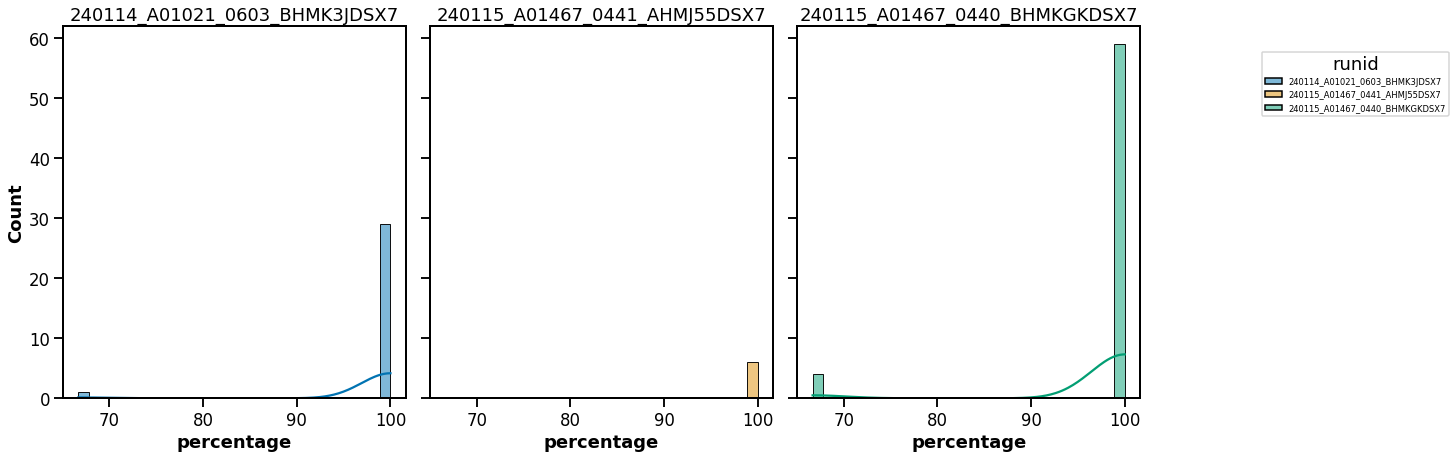

In [65]:
#check the NTC variants distribution
cc_out_dir = "/home/hazhang/projects/Quick_check_script/NCC_IST14_Infinity_01/carrier_contamination_check"
check_ntc(fc_dir_lst, cc_out_dir)
#get the batch ID
print(get_prod_set(fc_dir_lst))